In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target

print(df.head())

x_cancer = df.drop('target', axis=1)
y_cancer = df['target']

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(
    x_cancer, y_cancer, test_size=0.3, random_state=101
)

print('Train set shape:', x_train_c.shape)
print('Test set shape:', x_test_c.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:
scaler = StandardScaler()

scaler.fit(x_train_c)

x_train_scaled = scaler.transform(x_train_c)
x_test_scaled = scaler.transform(x_test_c)

df_train_scaled = pd.DataFrame(x_train_scaled, columns=x_cancer.columns)
print(df_train_scaled.describe())


        mean radius  mean texture  mean perimeter     mean area  \
count  3.980000e+02  3.980000e+02    3.980000e+02  3.980000e+02   
mean  -4.815802e-15  1.324457e-15   -1.008685e-15  7.007237e-16   
std    1.001259e+00  1.001259e+00    1.001259e+00  1.001259e+00   
min   -1.962948e+00 -2.197955e+00   -1.922573e+00 -1.409040e+00   
25%   -6.994600e-01 -7.395325e-01   -6.967683e-01 -6.761255e-01   
50%   -2.261573e-01 -9.832940e-02   -2.205841e-01 -3.021781e-01   
75%    4.750835e-01  5.834489e-01    4.982494e-01  3.216744e-01   
max    3.735923e+00  4.561537e+00    3.874681e+00  5.192092e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     3.980000e+02      3.980000e+02    3.980000e+02         3.980000e+02   
mean     -3.492460e-15     -7.397767e-16   -7.141133e-17        -5.645958e-16   
std       1.001259e+00      1.001259e+00    1.001259e+00         1.001259e+00   
min      -3.106701e+00     -1.596284e+00   -1.084206e+00        -1.23333

In [4]:
knn_cancer = KNeighborsClassifier(n_neighbors=1)

knn_cancer.fit(x_train_scaled, y_train_c)

print("โมเดล k-NN ถูกฝึกฝนเรียบร้อยแล้ว!!!")

โมเดล k-NN ถูกฝึกฝนเรียบร้อยแล้ว!!!


In [5]:
prediction = knn_cancer.predict(x_test_scaled)
print("Predictions:",prediction)

Predictions: [1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1]


confusion matrix:
[[ 61   5]
 [  3 102]]

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



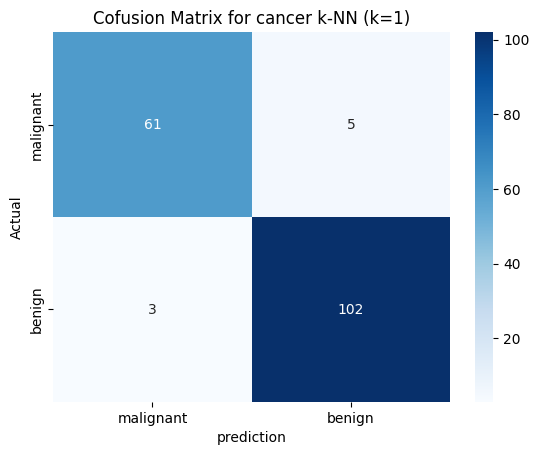

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, prediction)

print("confusion matrix:")
print(cm)
print("\nclassification_report:")
print(classification_report(y_test_c, prediction))
plt.Figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('Cofusion Matrix for cancer k-NN (k=1)')
plt.show()